# demo03_数学建模.ipynb  数学建模

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:xlabel='date'>

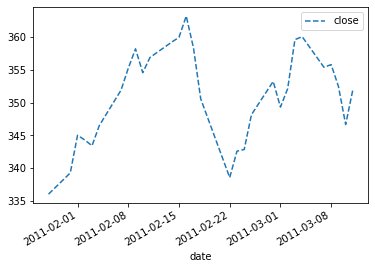

In [15]:
# 加载aapl.csv
data = pd.read_csv('../data/aapl.csv', header=None, 
                  usecols=[1, 6], names=['date', 'close'])

def dmy2ymd(item):
    return '-'.join(item.split('-')[::-1])

data['date']=pd.to_datetime(data['date'].apply(dmy2ymd))
data.plot(x='date', y='close', linestyle='--')

## 线性拟合-绘制趋势线


<ipython-input-26-ea5987a6f3eb>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, B)[0]


<AxesSubplot:xlabel='date'>

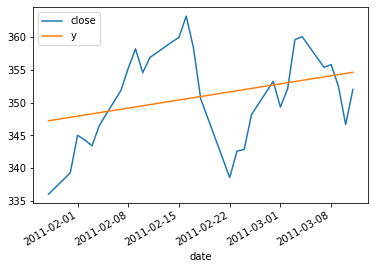

In [26]:
data['x'] = (data['date'] - pd.to_datetime('20110101')).dt.days
# 实现线性拟合：np.linalg.lstsq(A, B)  先整理 A 与 B
A = pd.DataFrame({'x':data['x'], '1':np.ones(30)})
B = data['close']
x = np.linalg.lstsq(A, B)[0]
# 通过 x中表达的斜率与截距， 计算趋势线上的点，绘制趋势线
data['y'] = x[0] * data['x'] + x[1]
data.plot(x='date', y=['close', 'y'])

## 多项式拟合

In [28]:
p = np.polyfit(data['x'], data['close'], 5)
p

array([-1.97919911e-05,  4.66447608e-03, -4.27249275e-01,  1.89446747e+01,
       -4.05027302e+02,  3.67749979e+03])

In [32]:
# 2011-02-01 带入方程  看一下预测结果      x:31
np.polyval(p, 38)

356.39567689443584

In [34]:
data

,date,close,x,y
0,2011-01-28,336.10,27,347.234839
1,2011-01-31,339.32,30,347.760575
2,2011-02-01,345.03,31,347.935821
3,2011-02-02,344.32,32,348.111066
4,2011-02-03,343.44,33,348.286312
5,2011-02-04,346.50,34,348.461557
6,2011-02-07,351.88,37,348.987294
7,2011-02-08,355.20,38,349.162539
8,2011-02-09,358.16,39,349.337785
9,2011-02-10,354.54,40,349.513031
